In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 注意！指定绘图风格后需要重新配置以显示中文
# sns.set_style('darkgrid',{'font.sans-serif':'Microsoft YaHei'}) 

# 数据提取

In [342]:
data_1 = pd.read_excel('cumcm2011A附件_数据.xls',sheet_name='附件1',header=None).iloc[2:,0:5]
data_1.columns = data_1.iloc[0,:].values
data_1.drop(data_1.index[0],inplace=True)
data_1 = data_1.reset_index(drop=True).astype(np.float32)
data_1

,编号,x(m),y(m),海拔(m),功能区
0,1.0,74.0,781.0,5.0,4.0
1,2.0,1373.0,731.0,11.0,4.0
2,3.0,1321.0,1791.0,28.0,4.0
3,4.0,0.0,1787.0,4.0,2.0
4,5.0,1049.0,2127.0,12.0,4.0
...,...,...,...,...,...
314,315.0,6924.0,5696.0,7.0,5.0
315,316.0,4678.0,3765.0,40.0,5.0
316,317.0,6182.0,2005.0,25.0,5.0
317,318.0,5985.0,2567.0,44.0,4.0


In [343]:
data_2 = pd.read_excel('cumcm2011A附件_数据.xls',sheet_name='附件2',header=None).iloc[2:,:]
data_2.columns = data_2.iloc[0,:].values
data_2.drop(data_2.index[0],inplace=True)
data_2 = data_2.reset_index(drop=True).astype(np.float32)
data_2

,编号,As (μg/g),Cd (ng/g),Cr (μg/g),Cu (μg/g),Hg (ng/g),Ni (μg/g),Pb (μg/g),Zn (μg/g)
0,1.0,7.84,153.800003,44.310001,20.559999,266.0,18.200001,35.380001,72.349998
1,2.0,5.93,146.199997,45.049999,22.510000,86.0,17.200001,36.180000,94.589996
2,3.0,4.90,439.200012,29.070000,64.559998,109.0,10.600000,74.320000,218.369995
3,4.0,6.56,223.899994,40.080002,25.170000,950.0,15.400000,32.279999,117.349998
4,5.0,6.35,525.200012,59.349998,117.529999,800.0,20.200001,169.960007,726.020020
...,...,...,...,...,...,...,...,...,...
314,315.0,6.47,197.000000,38.180000,21.090000,64.0,18.600000,40.180000,168.050003
315,316.0,6.47,100.699997,36.189999,13.310000,42.0,11.500000,34.340000,56.230000
316,317.0,4.79,119.099998,35.759998,19.709999,44.0,9.900000,39.660000,67.059998
317,318.0,7.56,63.500000,33.650002,21.900000,60.0,12.500000,41.290001,60.500000


In [344]:
data_3 = pd.read_excel('cumcm2011A附件_数据.xls',sheet_name='附件3',header=None).iloc[2:,:]
data_3.columns = data_3.iloc[0,:].values
data_3.drop(data_3.index[0],inplace=True)
data_3 = data_3.reset_index(drop=True)
data_3

,元素,平均值,标准偏差,范围
0,As (μg/g),3.6,0.9,1.8~5.4
1,Cd (ng/g),130,30,70~190
2,Cr (μg/g),31,9,13~49
3,Cu (μg/g),13.2,3.6,6.0~20.4
4,Hg (ng/g),35,8,19~51
5,Ni (μg/g),12.3,3.8,4.7~19.9
6,Pb (μg/g),31,6,19~43
7,Zn (μg/g),69,14,41~97


# 第一问
## 地累计指数污染物

In [345]:
B = data_3['平均值'].values.T # 当地无污染地区重金属元素的环境背景
A = data_3['标准偏差'].values.T # 考虑各地沉积岩差异可能引起的背景值变动系数
C = data_2.iloc[:,1:].values # 重金属元素的实测浓度值

In [359]:
def evaluation(data):
    rank = []
    for i in data:
        if i < 0:
            rank.append(0)
        elif 0< i <1:
            rank.append(1)
        elif 1<= i <2:
            rank.append(2)
        elif 2<= i <3:
            rank.append(3)
        elif 3<= i <4:
            rank.append(4)
        elif 4<= i <5:
            rank.append(5)
        elif 5<= i <6:
            rank.append(6)
    rank = np.array(rank)
    data = np.vstack((data,rank)).T
    return data

In [364]:
Igeo1 = np.log2(C[:,0]/(A[0]*B[0]))
Igeo1 = evaluation(Igeo1)
Igeo2 = np.log2(C[:,1]/(A[1]*B[1]))
Igeo2 = evaluation(Igeo2)
Igeo3 = np.log2(C[:,2]/(A[2]*B[2]))
Igeo3 = evaluation(Igeo3)
Igeo4 = np.log2(C[:,3]/(A[3]*B[3]))
Igeo4 = evaluation(Igeo4)
Igeo5 = np.log2(C[:,4]/(A[4]*B[4]))
Igeo5 = evaluation(Igeo5)
Igeo6 = np.log2(C[:,5]/(A[5]*B[5]))
Igeo6 = evaluation(Igeo6)
Igeo7 = np.log2(C[:,6]/(A[6]*B[6]))
Igeo7 = evaluation(Igeo7)
Igeo8 = np.log2(C[:,7]/(A[7]*B[7]))
Igeo8 = evaluation(Igeo8)

## 最近邻插值

In [381]:
from scipy.interpolate import griddata  # 导入scipy中的插值工具
# 导入已有数据
x, y, z = data_1['x(m)'].values, data_1['y(m)'].values, data_1['海拔(m)'].values
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),
                         1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
znew = griddata(points, values, xi=(xnew_grid, ynew_grid), method="nearest")


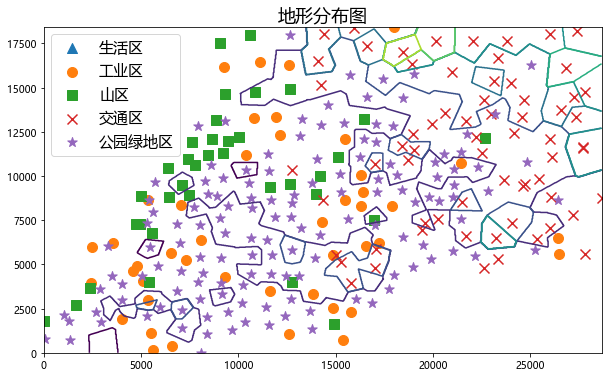

In [382]:
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('地形分布图',size=18)
ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

In [400]:
data_2

,编号,As (μg/g),Cd (ng/g),Cr (μg/g),Cu (μg/g),Hg (ng/g),Ni (μg/g),Pb (μg/g),Zn (μg/g)
0,1.0,7.84,153.800003,44.310001,20.559999,266.0,18.200001,35.380001,72.349998
1,2.0,5.93,146.199997,45.049999,22.510000,86.0,17.200001,36.180000,94.589996
2,3.0,4.90,439.200012,29.070000,64.559998,109.0,10.600000,74.320000,218.369995
3,4.0,6.56,223.899994,40.080002,25.170000,950.0,15.400000,32.279999,117.349998
4,5.0,6.35,525.200012,59.349998,117.529999,800.0,20.200001,169.960007,726.020020
...,...,...,...,...,...,...,...,...,...
314,315.0,6.47,197.000000,38.180000,21.090000,64.0,18.600000,40.180000,168.050003
315,316.0,6.47,100.699997,36.189999,13.310000,42.0,11.500000,34.340000,56.230000
316,317.0,4.79,119.099998,35.759998,19.709999,44.0,9.900000,39.660000,67.059998
317,318.0,7.56,63.500000,33.650002,21.900000,60.0,12.500000,41.290001,60.500000


In [ ]:
from scipy.interpolate import griddata  # 导入scipy中的插值工具
# 导入已有数据
data_igeo = [Igeo1,Igeo2,Igeo3,Igeo4,Igeo5,Igeo6,Igeo7,Igeo8]
label = ['As(μg/g)','Cd(ng/g)','Cr(μg/g)','Cu(μg/g)','Hg(ng/g)','Ni(μg/g)','Pb(μg/g)','Zn(μg/g)']
for i in range(8):
x, y = data_1['x(m)'].values, data_1['y(m)'].values
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),
                         1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
znew = griddata(points, values, xi=(xnew_grid, ynew_grid), method="nearest")

## 样条插值

In [403]:
from scipy.interpolate import griddata  # 导入scipy中的插值工具
# 导入已有数据
x, y, z = data_1['x(m)'].values, data_1['y(m)'].values, data_1['海拔(m)'].values
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values=z.ravel()
znew = griddata(points,values,
              xi=(xnew_grid, ynew_grid),
              method="cubic")

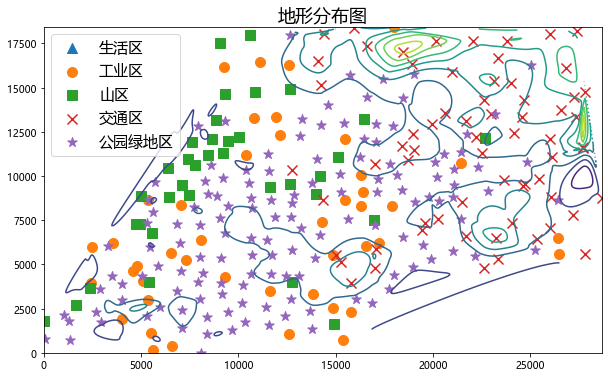

In [404]:
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('地形分布图',size=18)
ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

In [429]:
x, y = data_1['x(m)'].values, data_1['y(m)'].values
z = Igeo1[:, 1]
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
znew = griddata(points, values, xi=(xnew_grid, ynew_grid), method="cubic")

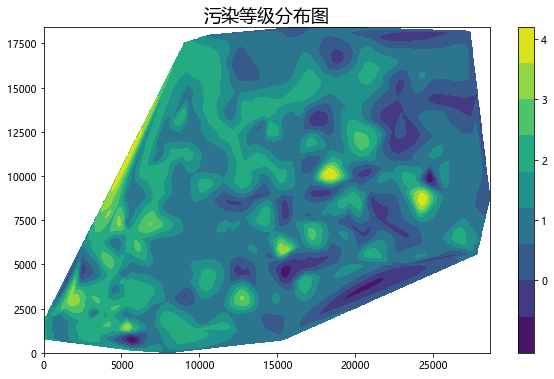

In [430]:
from matplotlib import colorbar
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('污染等级分布图',size=18)
im = ax.contourf(xnew_grid, ynew_grid, znew,8)
cbar = fig.colorbar(ax=ax,mappable=im, orientation='vertical',ticks=[0,1,2,3,4,5,6])

In [431]:
x, y = data_1['x(m)'].values, data_1['y(m)'].values
z = Igeo1[:, 0]
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
znew = griddata(points, values, xi=(xnew_grid, ynew_grid), method="cubic")

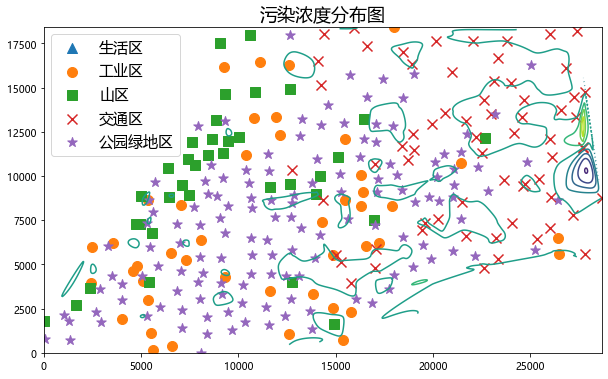

In [435]:
from matplotlib import colorbar
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('污染浓度分布图',size=18)
im = ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

## IDM插值

In [392]:
def IDW(xnewgrid,ynewgrid,x, y, z, b=2):
    """
    :param xnew: 网格化的插值点x
    :param ynew: 网格化的插值点y
    :param x: 已知数据点x
    :param y: 已知数据点y
    :param z: 已知数据点z
    :return: 插值结果
    """
    xnewgrid_, ynewgrid_ = xnewgrid.ravel(), ynewgrid.ravel()
    znew = []
    # 计算每个插值点的插值结果
    for i in range(len(xnewgrid_)):   
        # 遍历计算所有离散数据点与该插值点的距离
        d = np.sqrt((xnewgrid_[i]-x)**2 + (ynewgrid_[i]-y)**2) # 计算两点间的距离
        if 0 in d:
            znew.append(z[np.where(d == 0)[0][0]]) # 如果插值点为离散数据点中的一个，则直接返回该点的值
        else:
            distance = 1 / (d**b) # 计算距离权重函数, b为距离倒数的幂，常数，一般b越大，内插结果越平滑
            distance_sum = np.sum(distance)
            distance_weight = distance / distance_sum
            znew.append(np.sum(distance_weight * z))
    znew = np.array(znew)
    znew = znew.reshape(xnewgrid.shape)
    return znew

In [393]:
# 导入已有数据
x, y, z = data_1['x(m)'].values, data_1['y(m)'].values, data_1['海拔(m)'].values
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),
                         1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
znew = IDW(xnew_grid, ynew_grid, x, y, z, b=5)

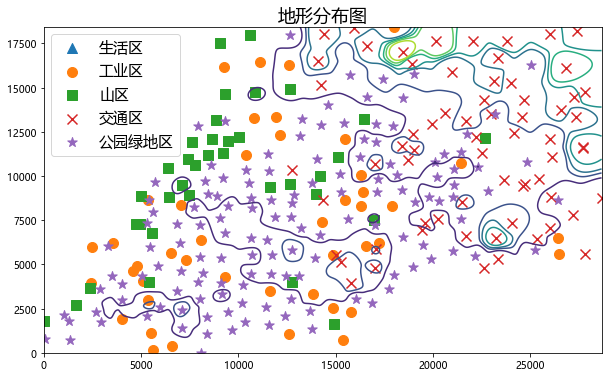

In [394]:
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('地形分布图',size=18)
ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

## Kriging插值

In [395]:
from pykrige.ok import OrdinaryKriging
# 导入已有数据
x, y, z = data_1['x(m)'].values, data_1['y(m)'].values, data_1['海拔(m)'].values
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),
                         1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)

In [398]:
# 创建克里金网格和方差网格
OK = OrdinaryKriging(
    x,
    y,
    z,
    variogram_model="linear",
    nlags=6,
    verbose=False,
    enable_plotting=False,
)
znew, ss = OK.execute("grid", xnew, ynew)

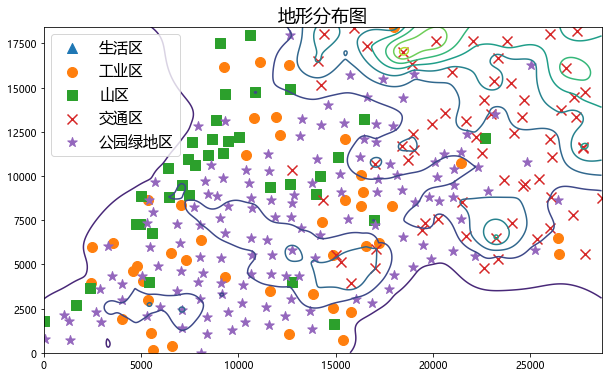

In [399]:
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('地形分布图',size=18)
ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

In [451]:
x, y = data_1['x(m)'].values, data_1['y(m)'].values
z = Igeo1[:, 1]
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 创建克里金网格和方差网格
OK = OrdinaryKriging(
    x,
    y,
    z,
    variogram_model="linear",
    nlags=6,
    verbose=False,
    enable_plotting=False,
)
znew, ss = OK.execute("grid", xnew, ynew)

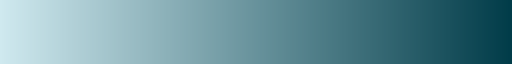

In [466]:
import matplotlib as mpl
# 生成6个渐变色
blue_gradient = mpl.colors.LinearSegmentedColormap.from_list('Blue', 
                                             [(0,    '#cfe9ef'),
                                              (1,    '#013c49')], N=256)
blue_gradient

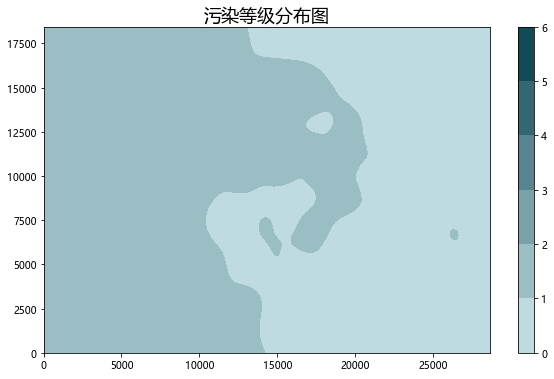

In [467]:
from matplotlib import colorbar
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('污染等级分布图',size=18)
norm = mpl.colors.Normalize(vmin=0, vmax=6)
im = ax.contourf(xnew_grid, ynew_grid, znew,levels=[0,1,2,3,4,5,6],cmap=blue_gradient,norm=norm)
cbar = fig.colorbar(ax=ax,mappable=im, orientation='vertical')

In [ ]:
x, y = data_1['x(m)'].values, data_1['y(m)'].values
z = Igeo1[:, 0]
# 生成插值网格
xnew, ynew = np.linspace(x.min(), x.max(),1000), np.linspace(y.min(), y.max(), 1000)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)
# 计算插值结果
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
znew = griddata(points, values, xi=(xnew_grid, ynew_grid), method="cubic")

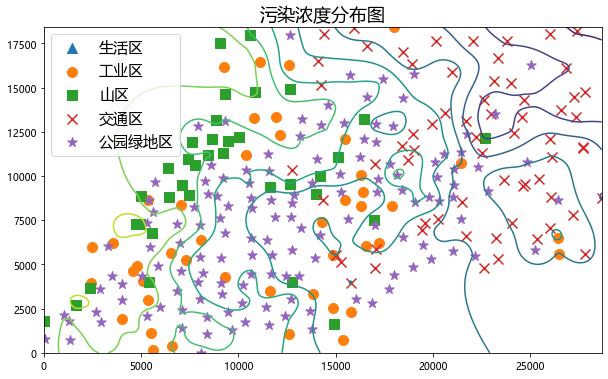

In [438]:
from matplotlib import colorbar
fig, ax= plt.subplots(1, figsize=(10,6))
ax.set_title('污染浓度分布图',size=18)
im = ax.contour(xnew_grid, ynew_grid, znew,8)
marker = ['^','o','s','x','*']
label = ['生活区','工业区','山区','交通区','公园绿地区']
for i in range(5):
    temp = data_1.loc[data_1['功能区']==i]
    ax.scatter(temp['x(m)'], temp['y(m)'],s=100, marker=marker[i], label=label[i])
    ax.legend(fontsize=15)

# 第二问
## Pearson相关性分析

In [ ]:
X = data_2.iloc[:,1:]
X.corr(method='pearson')

## Kmeans聚类

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score = {}
X = X.T
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=666,verbose=0)
    kmeans.fit(X)
    y_pred = kmeans.fit_predict(X)
    score[str(i)] = silhouette_score(X=X, labels=y_pred, random_state=666)

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(2,8),score.values(),lw=1.2,marker='o',color='red')
_ = ax.set_xticks(np.arange(2,8))
ax.set_xlabel('聚类数量',size=15)
ax.set_ylabel('平均轮廓系数',size=15)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
X_cluster = kmeans.fit_predict(X)
X_cluster

## DBSCAN聚类

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing  
# 构建空列表，用于保存不同参数组合下的结果
X = data_2.iloc[:,1:].T
X = preprocessing.MinMaxScaler().fit_transform(X)
res = []
# 迭代不同的eps值
for eps in np.arange(0.1, 3, 0.2):
    # 迭代不同的min_samples值
    for min_samples in range(2, 20):
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        # 模型拟合
        clustering.fit(X)
        y_pred = clustering.fit_predict(X)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(clustering.labels_) if i != -1])
        # 异常点的个数
        outlines = np.sum(np.where(clustering.labels_ == -1, 1, 0))
        res.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'outlines': outlines})

# 将迭代后的结果存储到数据框中
df = pd.DataFrame(res)

In [ ]:
df # 样本量太少，无法聚类，DBSCAN适用于大样本聚类